<a href="https://colab.research.google.com/github/lauraceciliadiazdavila/IA-2023/blob/main/08_HAC/H_A_C_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

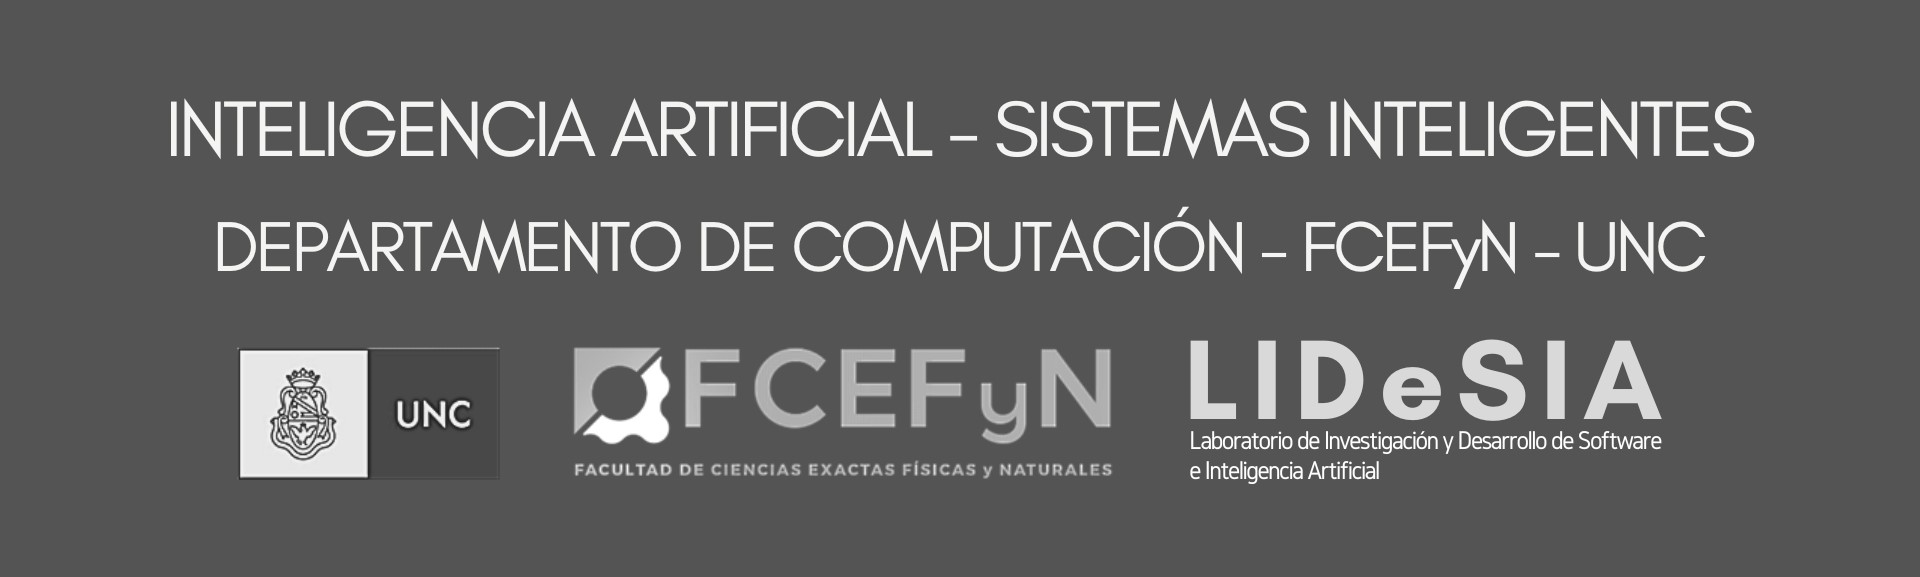

# H.A.C
---


FCEFyN - UNC - Cátedra de Inteligencia Artificial

---

*   Autor/es: Lucas Signorini (LIDeSIA - FCEFyN)

*   Directora: Dra. Laura Cecilia Diaz Davila (LIDeSIA - FCEFyN)

---



##Clustering Jerarquico: H.A.C


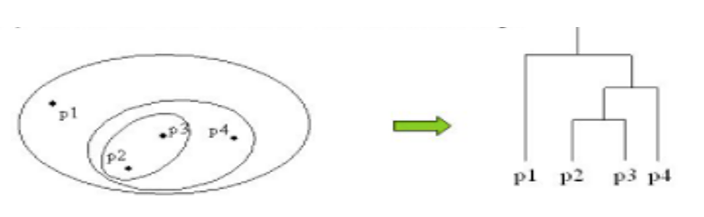

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Wholesale_customers_data.csv to Wholesale_customers_data (1).csv


Informacion del dataset (AKA metadata):
https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set

In [ ]:
data = pd.read_csv('/content/Wholesale_customers_data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


Normalizacion:

In [ ]:
from sklearn.preprocessing import normalize

data_norm = normalize (data)
data_norm = pd.DataFrame (data_norm, columns = data.columns) #Creamos un dataframe solo para visualizacion
data_norm


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
...,...,...,...,...,...,...,...,...
435,0.000026,0.000078,0.776890,0.315197,0.419191,0.343549,0.004760,0.057646
436,0.000025,0.000076,0.990872,0.036146,0.019298,0.113919,0.002349,0.059258
437,0.000050,0.000075,0.364462,0.388465,0.758545,0.010961,0.372237,0.046827
438,0.000091,0.000273,0.937737,0.180530,0.203404,0.094594,0.015310,0.193653


Dendograma:

Un dendrograma es una representación gráfica en forma de árbol que organiza los datos en subcategorías que se van dividiendo en otros hasta llegar al nivel de detalle deseado.

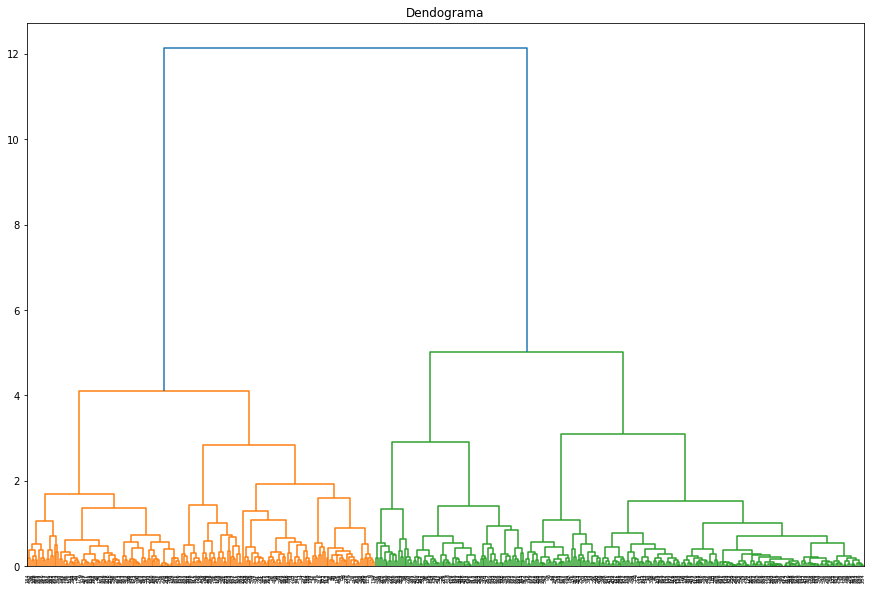

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15,10))
plt.title("Dendograma")
dend = shc.dendrogram(shc.linkage(data_norm, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clusters = AgglomerativeClustering(n_clusters = 4 , affinity = 'euclidean', linkage = 'ward')


In [ ]:
clusters.fit_predict(data_norm)

array([1, 1, 1, 2, 0, 1, 0, 1, 1, 3, 3, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 3,
       1, 1, 3, 1, 1, 3, 2, 1, 0, 3, 0, 1, 3, 1, 0, 1, 0, 1, 1, 1, 2, 3,
       3, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 0, 3, 1, 0, 0, 3, 1, 0,
       2, 0, 0, 2, 1, 2, 1, 3, 3, 2, 2, 2, 1, 3, 1, 0, 0, 0, 3, 1, 1, 3,
       0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 1, 1, 1, 1, 0, 2, 3, 1, 3, 3, 3, 3,
       0, 0, 0, 1, 0, 0, 3, 1, 3, 2, 2, 3, 1, 1, 2, 0, 0, 3, 0, 2, 2, 3,
       2, 0, 3, 3, 0, 3, 3, 3, 0, 1, 3, 3, 0, 3, 0, 1, 3, 3, 3, 0, 3, 2,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 3, 0, 0, 0, 2, 2, 3, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 3,
       3, 1, 3, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 3, 1, 0, 0, 0, 0, 1, 3, 0,

In [ ]:
data['Cluster'] = clusters.labels_
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,2
436,1,3,39228,1431,764,4510,93,2346,0
437,2,3,14531,15488,30243,437,14841,1867,1
438,1,3,10290,1981,2232,1038,168,2125,0


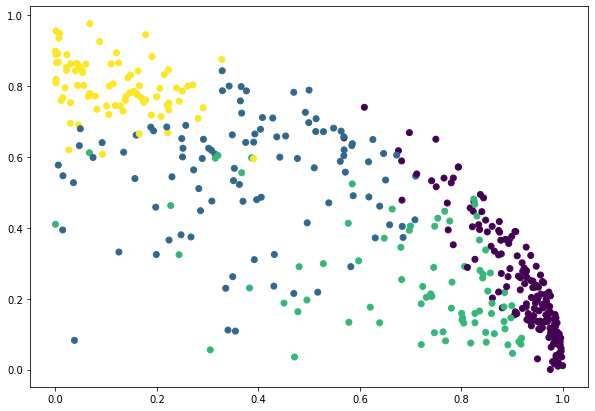

In [ ]:
##REVISAR ESTA VISUALIZACION ANTES DE PROX CLASE, A LAU NO LE GUSTO
plt.figure(figsize=(10,7))
plt.scatter(data_norm['Fresh'], data_norm['Grocery'], c=clusters.labels_)

Arbol para buscar las reglas de los grupos:

In [ ]:
from sklearn import tree
model_params={
        'decision tree': {
        'model':tree.DecisionTreeClassifier(),
        'params':{
            'max_depth':[5, 10],
            'min_samples_split':[10,50],
            'min_samples_leaf':[10,50],
            'criterion':['gini','entropy']
        }
    }
}

In [ ]:
inputs=data_norm
target=np.array(data['Cluster'])

In [ ]:
from sklearn.model_selection import train_test_split
train_inputs, test_inputs, train_target, test_target = train_test_split(inputs, target, test_size = 0.2, random_state = 42)
print('train inputs', train_inputs.shape)
print('train targets', train_target.shape)
print('test inputs', test_inputs.shape)
print('test targtet', test_target.shape)

train inputs (352, 8)
train targets (352,)
test inputs (88, 8)
test targtet (88,)


In [ ]:
from sklearn.model_selection import GridSearchCV
score=[]

for model_name, mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5, return_train_score=False)

    clf.fit(train_inputs, train_target)

    score.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [ ]:
df_score=pd.DataFrame(score,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,decision tree,0.980121,"{'criterion': 'gini', 'max_depth': 5, 'min_sam..."


In [ ]:
Tree=tree.DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=10, min_samples_split=101).fit(train_inputs, train_target)



In [ ]:
from sklearn.metrics import accuracy_score
pred = Tree.predict(test_inputs)
accuracy_score(test_target, pred)

0.9772727272727273

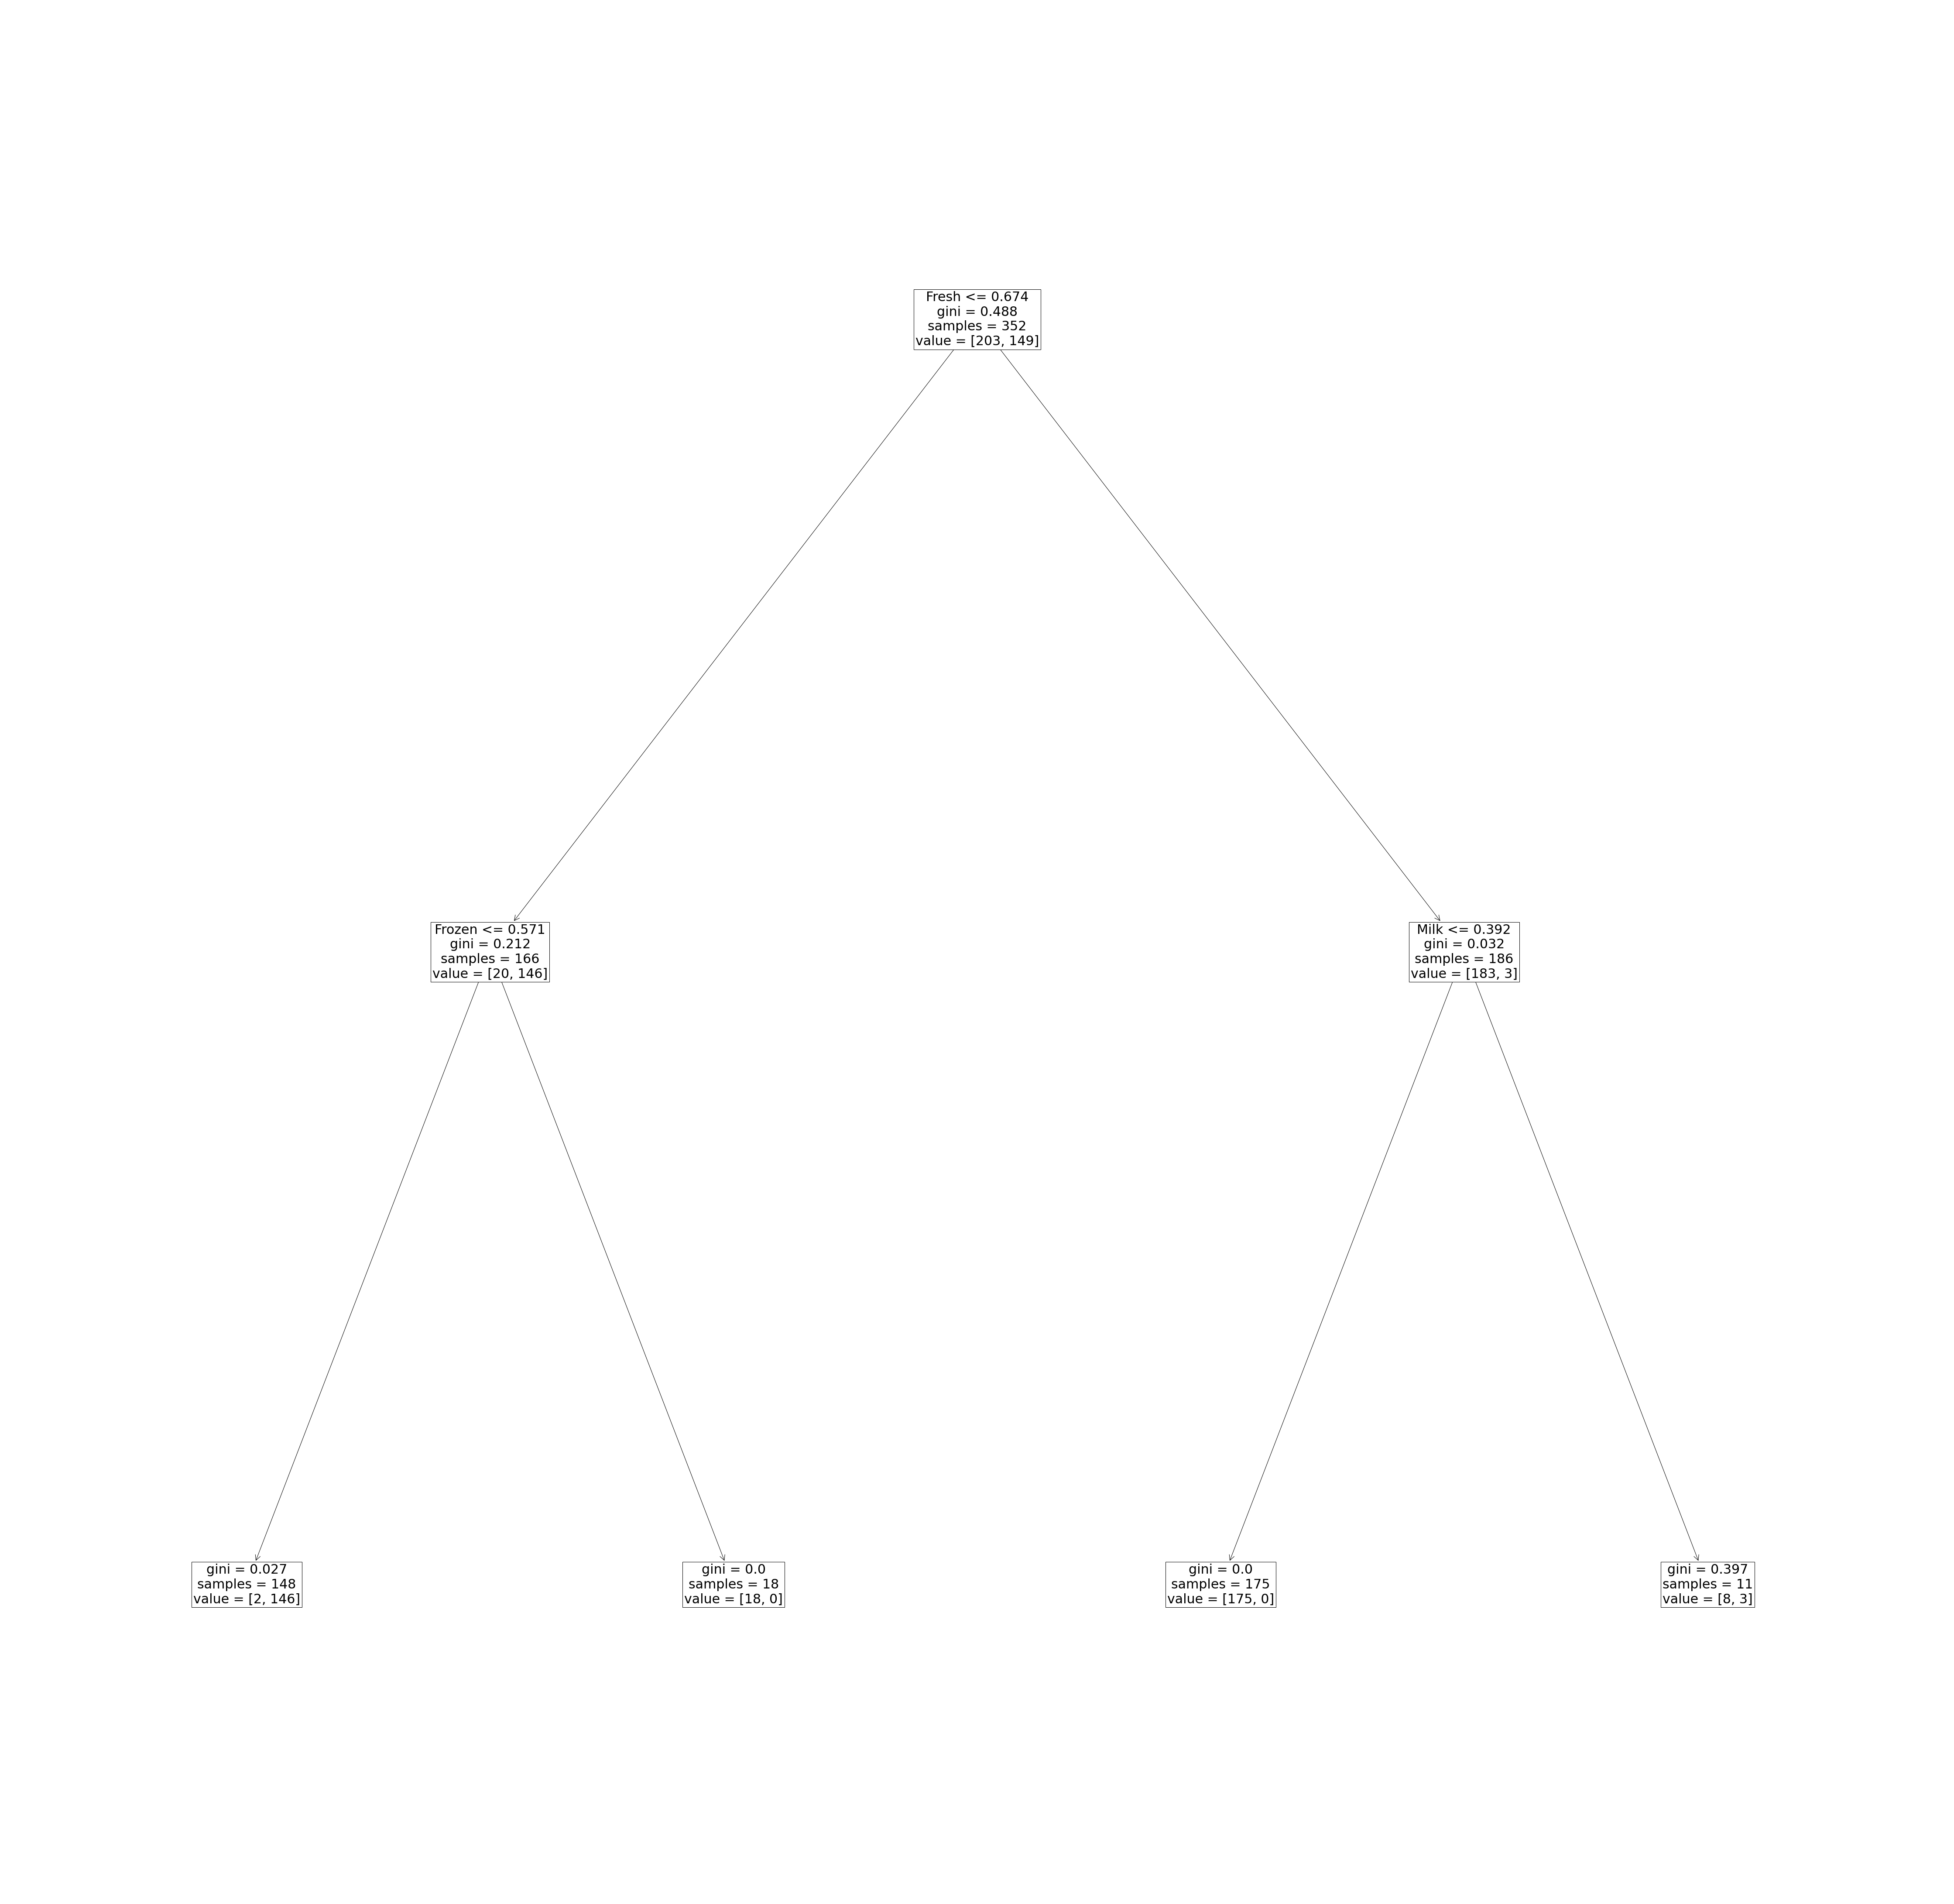

In [ ]:
plt.figure(figsize=(20, 80))
tree.plot_tree(Tree, fontsize= 30, feature_names=list(inputs.columns))
plt.show()

Clasificacion Cluster 0: Fresh > 0.674 & Milk < 0.392 -> Gastan mucho en cosas frescas pero no en leche


Clasificacion Cluster 1: Fresh < 0.674 & Frozen < 0.571 -> Compra poco cosas frescas y poco congelado